# El camino hacia los splines.

**Objetivo general.**
- Revisar e implementar algunas técnicas de interpolación, basadas en splines, y aplicarlas a datos reales.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import macti.visual as mvis

# Introducción

Dado un conjunto de datos del estilo:

|$x$  | $f(x)$ |
|---|---|
|$x_0$|$f(x_0)$|
|$\dots$|$\dots$|
|$x_N$|$f(x_N)$|

¿Será posible encontrar $f(x)$ para $x \notin [x_0, \dots, x_N]$ ?

Por ejemplo, para los datos que se usan en el artículo:  

<blockquote cite="https://doi.org/10.1016/j.jvolgeores.2015.09.019">
    Canet, Carles <i>et al</i>. (<b>2015</b>). Thermal history of the Acoculco geothermal system, eastern Mexico: Insights from numerical modeling and radiocarbon dating. <i>Journal of Volcanology and Geothermal Research</i>. <b>305<b>. https://doi.org/10.1016/j.jvolgeores.2015.09.019
</blockquote>

Leemos el conjunto de datos.

In [2]:
dat_ini = pd.read_csv('T_inicial.csv')
dat_ini

,Depth,Temp
0,0,15
1,100,113
2,200,145
3,400,178
4,710,155
5,803,201
6,1100,215
7,1200,282
8,1400,223
9,1500,226


Usamos las etiquetas `Depth` y `Temp` para la profundidad y la temperatura respectivamente.

In [3]:
Depth = np.array(dat_ini.Depth)
Temp  = np.array(dat_ini.Temp)

Para entender mejor los datos vamos a graficarlos.

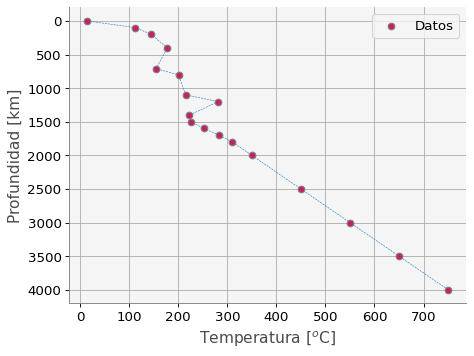

In [4]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='gray', fc='C3', alpha=0.95, zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, '--', lw = 0.5)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

# Interpolación lineal.

$$
S(x) = m x + b
$$

Supongamos que tenemos dos parejas de datos del tipo $(x, f(x))$ :

|$x$| $f(x)$ |
|---|---|
|$3$|$54$|
|$5$|$123$|

In [5]:
x0, f0 = 3, 54
x1, f1 = 5, 123

Grafiquemos estos datos

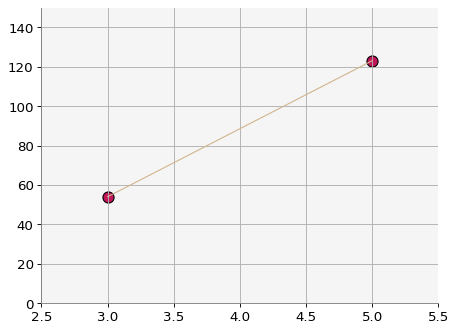

In [6]:
plt.scatter([x0, x1], [f0, f1], s=100, ec='k', fc='C3')
plt.plot([x0, x1], [f0, f1], c='tan', lw=1.0)
plt.xlim(2.5,5.5)
plt.ylim(0,150)
plt.grid()
plt.show()

**¿Cual sería el valor de $f(x)$ para $x = 3.75$?**

## Construcción de una función lineal

Usando los datos calculamos los coeficientes de la ecuación de la recta que une a los puntos:

In [7]:
m = (f1 - f0) / (x1 - x0) # Pendiente
b = f0 - m * x0           # Ordenada al origen

In [8]:
print('m = {}'.format(m))
print('b = {}'.format(b))

m = 34.5
b = -49.5


Entonces, la ecuación de la recta se puede escribir como sigue:

In [9]:
S = lambda x, m, b: m * x + b

Evaluamos la ecuación de la recta en el punto $x = 3.75$ y obtenemos

In [10]:
x = 3.75
y = S(x, m, b)
print(y)

79.875


Graficamos el resultado

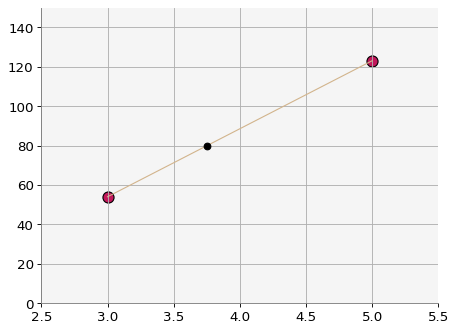

In [11]:
plt.scatter(x, y, c='k', zorder = 5)
plt.scatter([x0, x1], [f0, f1], s=100, ec='k', fc='C3')
plt.plot([x0, x1], [f0, f1], c='tan', lw=1.0)
plt.xlim(2.5,5.5)
plt.ylim(0,150)
plt.grid()
plt.show()

## Aplicación a un punto del ejemplo real.

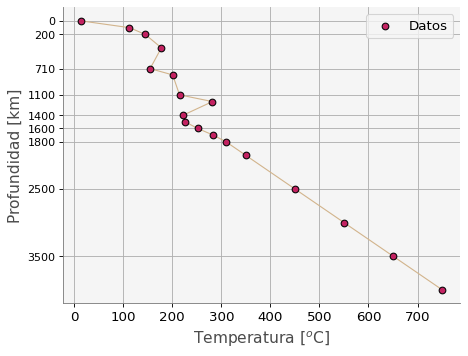

In [12]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', alpha=0.95, zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

plt.gca().invert_yaxis()
plt.yticks(ticks = Depth[::2], labels = Depth[::2], fontsize=10)
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

In [13]:
dat_ini.iloc[3:5]

,Depth,Temp
3,400,178
4,710,155


In [14]:
x0, f0 = 400, 178
x1, f1 = 710, 155

m = (f1 - f0) / (x1 - x0) # Pendiente
b = f0 - m * x0           # Ordenada al origen

x = 600 # Punto donde queremos aproximar
y = S(x, m, b)
print(y)

163.16129032258067


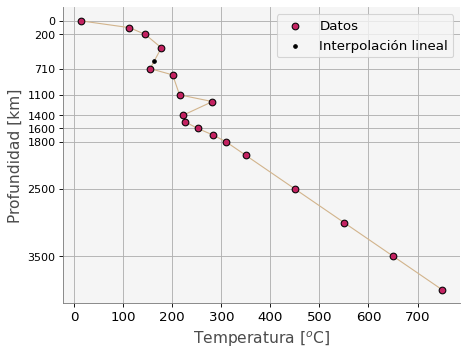

In [15]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', alpha=0.95, zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

# Información interpolada
plt.scatter(y, x, c ='k', s = 10, label = 'Interpolación lineal', zorder=5)

plt.gca().invert_yaxis()
plt.yticks(ticks = Depth[::2], labels = Depth[::2], fontsize=10)
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

## Aplicación a todo el conjunto de datos

In [16]:
import interpoladores 

In [17]:
L = 4000.0  # Profundidad máxima
N = 99                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad
print(z)

[   0.   40.   80.  120.  160.  200.  240.  280.  320.  360.  400.  440.
  480.  520.  560.  600.  640.  680.  720.  760.  800.  840.  880.  920.
  960. 1000. 1040. 1080. 1120. 1160. 1200. 1240. 1280. 1320. 1360. 1400.
 1440. 1480. 1520. 1560. 1600. 1640. 1680. 1720. 1760. 1800. 1840. 1880.
 1920. 1960. 2000. 2040. 2080. 2120. 2160. 2200. 2240. 2280. 2320. 2360.
 2400. 2440. 2480. 2520. 2560. 2600. 2640. 2680. 2720. 2760. 2800. 2840.
 2880. 2920. 2960. 3000. 3040. 3080. 3120. 3160. 3200. 3240. 3280. 3320.
 3360. 3400. 3440. 3480. 3520. 3560. 3600. 3640. 3680. 3720. 3760. 3800.
 3840. 3880. 3920. 3960. 4000.]


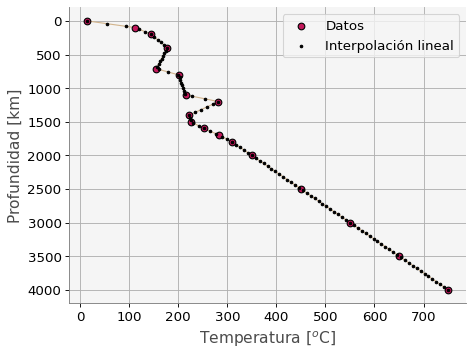

In [18]:
# Usamos la función de interpolación lineal
_, _, T_li = interpoladores.spline_lineal(Depth, Temp, z)

# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

# Información interpolada
plt.scatter(T_li, z, c='k', s = 5, label = 'Interpolación lineal', zorder=5)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

# Interpolación cuadrática

La interpolación lineal no es muy efectiva, a menos que se tenga mucha información. Se puede hacer uso de polinomios de más alto orden. Por ejemplo:

$$
S(x) = a x^2 + b x + c
$$

Consideremos el siguiente ejemplo:

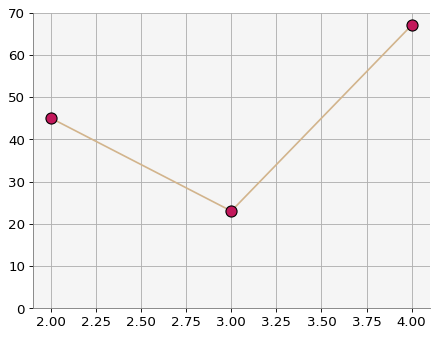

In [19]:
x0, x1, x2 = 2, 3, 4
f0, f1, f2 = 45, 23, 67

plt.scatter([x0, x1, x2], [f0, f1, f2], s=100, ec='k', fc='C3', zorder=5)
plt.plot([x0, x1, x2], [f0, f1, f2], c='tan')
plt.ylim(0,70)
plt.grid()
plt.show()

## Construcción de una función cuadrática

Si evaluamos la función cuadrática en cada uno de los puntos obtenemos:

$$
\begin{eqnarray}
S(x_0) & = & a x_0^2 + b x_0 + c \\
S(x_1) & = & a x_1^2 + b x_1 + c \\
S(x_2) & = & a x_2^2 + b x_2 + c 
\end{eqnarray}
$$

Tenemos entonces un sistema de ecuaciones que debemos resolver para encontrar $a$, $b$ y $c$:

$$
\left[
\begin{array}{ccc}
x_0^2 & x_0 & 1 \\
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1
\end{array}
\right] 
\left[
\begin{array}{c}
a \\ b \\ c
\end{array}
\right]
= 
\left[
\begin{array}{c}
f(x_0) \\ f(x_1) \\ f(x_2)
\end{array}
\right]
$$

In [20]:
A = np.array([[x0**2, x0, 1],
              [x1**2, x1, 1],
              [x2**2, x2, 1]])
A

array([[ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1]])

In [21]:
RHS = np.array([f0,f1,f2])
RHS

array([45, 23, 67])

In [22]:
sol = np.linalg.solve(A,RHS)
print(sol)

[  33. -187.  287.]


Definimos nuestra función cuadrática:

In [23]:
S_q = lambda x, a, b, c: a * x**2 + b * x + c

Evaluamos la función cuadrática en un punto:

In [24]:
a, b, c = sol[0], sol[1], sol[2]
x = 2.5
y = S_q(x, a, b, c)
print(y)

25.75


Graficamos el resultado:

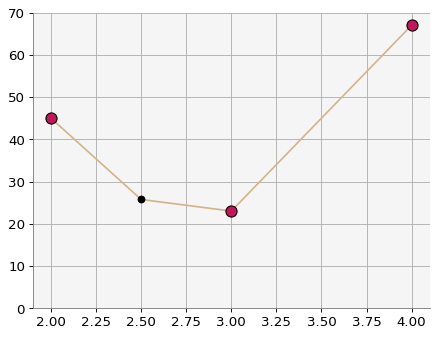

In [25]:
plt.scatter(x, y, c='k', zorder = 5)
plt.scatter([x0, x1, x2], [f0, f1, f2], s=100, ec='k', fc='C3', zorder=5)
plt.plot([x0, x, x1, x2], [f0, y, f1, f2], c='tan')
plt.ylim(0,70)
plt.grid()
plt.show()

Sería bueno graficar la función cuadrática

In [26]:
xq = np.linspace(2,4,50)
yq = S_q(xq, a, b, c)

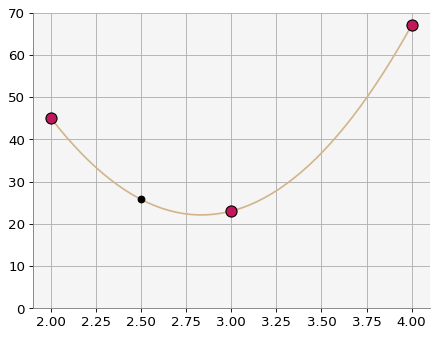

In [27]:
plt.scatter(x, y, c='k', zorder = 5)
plt.scatter([x0, x1, x2], [f0, f1, f2], s=100, ec='k', fc='C3', zorder=5)
plt.plot(xq, yq, c='tan')
plt.ylim(0,70)
plt.grid()
plt.show()

## Aplicación a un punto del ejemplo real.

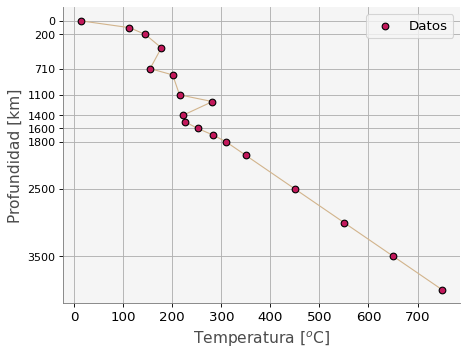

In [28]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

plt.gca().invert_yaxis()
plt.yticks(ticks = Depth[::2], labels = Depth[::2], fontsize=10)
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

In [29]:
dat_ini.loc[6:8]

,Depth,Temp
6,1100,215
7,1200,282
8,1400,223


In [30]:
x0, f0 = 1100, 215
x1, f1 = 1200, 282
x2, f2 = 1400, 223

A = np.array([[x0**2, x0, 1],
              [x1**2, x1, 1],
              [x2**2, x2, 1]])
RHS = np.array([f0,f1,f2])
sol = np.linalg.solve(A,RHS)

a, b, c = sol[0], sol[1], sol[2]
x = 1300
y = S_q(x, a, b, c)
print(y)

284.66666666666697


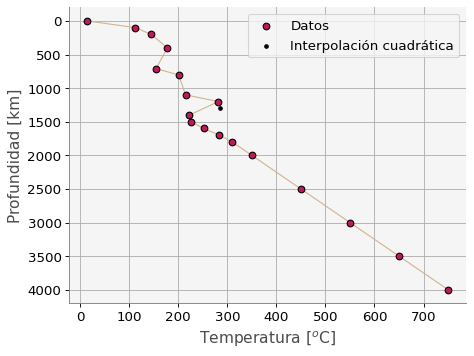

In [31]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

# Información interpolada
plt.scatter(y, x, c='k', s = 10, label = 'Interpolación cuadrática')

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

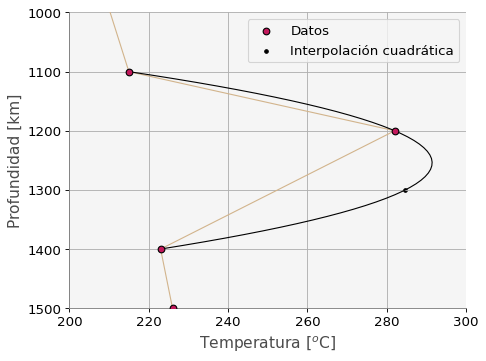

In [33]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 1.0, c='tan')

# Información interpolada
plt.scatter(y, x, c='k', s = 10, label = 'Interpolación cuadrática')

# Gráfica de la función cuadrática
xq = np.linspace(1100,1400,50)
yq = S_q(xq, a, b, c)
plt.plot(yq, xq, lw = 1.0, c='k')

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')

# Para hacer un zoom descomenta las siguientes dos líneas
plt.xlim(200,300)
plt.ylim(1500, 1000)

plt.legend()
plt.grid()
plt.show()

## Aplicación a todo el conjunto de datos

In [34]:
d_q, s_q, T_ci = interpoladores.spline_quad(Depth, Temp, z)

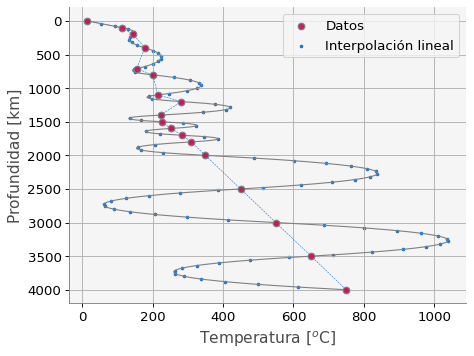

In [35]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='gray', fc='C3', alpha=0.95, zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, '--', lw = 0.5)

# Información interpolada
plt.scatter(T_ci, z, c='C0', s=5,label = 'Interpolación lineal')
plt.plot(s_q, d_q, c='gray',lw=1.0)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

# Interpolación cúbica.

La forma general de una función cúbica es:

$$
f_i(x) = a_ix^3 + b_ix^2 +c_ix + d_i
$$

donde $a_i, b_i, c_i, d_i$ son los coeficientes para cada término cúbico, cuadrático y lineal.

Si tenemos $n$ puntos (con $i=0, 1, 2, \dots, n - 1$), tendremos entonces $k = n -1$ intervalos, y por lo tanto, $4k$ constantes desconocidas. Como en el caso del spline cuadrático, existen 5 condiciones importantes a tomar en cuenta para encontrar estas constantes:

1. $S_{i + 1}(x_{i}) = S_i(x_i)$ para cada $i = 0, 1, \dots, n - 2$.
2. $S_i(x_i) = f(x_i)$ y $S_i(x_{i + 1}) = f(x_{i + 1})$ para cada $i = 0, 1, \dots, n -1$.
3. $S'_{i + 1}(x_{i}) = S'_i(x_i)$ para cada $i = 0, 1, \dots, n - 2$.
4. $S''_{i + 1}(x_{i}) = S''_i(x_i)$ para cada $i = 0, 1, \dots, n - 2$.
5. $S''(x_0) = S''(x_n) = 0$

## Spline cúbico natural: algoritmo

La construcción del sistema de ecuaciones para el spline cúbico deriva, como en el caso anterior, de las condiciones que hemos puesto para esta aproximación. Recordemos que tenemos $n$ puntos y, por ende, $k = n - 1$ intervalos. Si tenemos 4 coeficientes por intervalo, en total tendremos $4k$ incógnitas.

Ahora, sean $z_i = S''_i(x_i)$ para $0 \leq i \leq n$, sobre el intervalo $[x_i, x_{i + 1}]$. Con este cambio, podemos decir que $S''_i(x)$ interpolacion lineal. Asumiendo que $S''_i(x_i) = z_i$ y $S''_i(x_{i + 1}) = z_{x + 1}$, podemos escribir:

$$
S''_i(x) = \frac{x - x_{i + 1}}{x_i - x_{i + 1}} z_i + \frac{x - x_i}{x_{i + 1} - x_i} z_{i + 1}
$$

Integrando $S''_i(x)$ dos veces

$$
S_i(x) = (x_{i + 1} - x)^3 \frac{z_i}{6 h_i} + (x - x_i)^3 \frac{z_{i + 1}}{6 h_i} + cx + d \tag{1}
$$

donde $h_i = x_{i + 1} - x_i$ y $c, d$ son constantes resultado de la integración.

Si aplicamos la condición **2**, obtenemos el siguiente sistema de ecuaciones

$$
\left\{\begin{align}
h_i^3 \frac{z_i}{6 h_i} + c x_i + d = y_i \\
h_i^3 \frac{z_i}{6 h_i} + c x_{i + 1} + d = y_{i + 1}
\end{align}\right.
$$

y al resolverlo para los coeficientes $c_i$ y $d_i$, llegamos a este resultado:

$c = \frac{y_{i + 1} - y_i}{h_i} - \frac{z_{i + 1} - z_i}{6} h_i$ y $d = \frac{y_i x_{i + 1} - y_{i + 1} x_i}{h_i} + \frac{x_i z_{i + 1} - x_{i + 1} z_i}{6} h_i$

Reemplazando estos coeficientes encontrados en la ecuación $(1)$

$$
S_i(x) = (x_{i + 1} - x)^3 \frac{z_i}{6 h_i} + (x - x_i)^3 \frac{z_{i + 1}}{6 h_i} + \left( \frac{y_{i + 1} - y_i}{h_i} - \frac{z_{i + 1} - z_i}{6} h_i \right) x + \frac{y_i x_{i + 1} - y_{i + 1} x_i}{h_i} + \frac{x_i z_{i + 1} - x_{i + 1} z_i}{6} h_i \tag{2}
$$

Para encontrar $z_i$ y $z_{i + 1}$ usamos la condición **3**, por lo tanto, derivamos la ecuación $(2)$ y reemplazando llegamos a:

$$
S'_i(x_i) = -\frac{1}{3} h_i z_i - \frac{1}{6} h_i z_{i + 1} + d_i
$$

y

$$
S'_{i - 1}(x_i) = \frac{1}{6} h{i - 1} z_{i - 1} + \frac{1}{3} h_{i - 1} z_i + d_{i - 1}
$$

donde $d_i = \frac{y_{i + 1} - y_i}{h_i}$ y $d_{i - 1} = \frac{y_i - y_{i - 1}}{h_{i - 1}}$

Sabiendo que $S'_{i - 1}(x_i) = S'_i(x_i)$ (condición **1**):

$$
h_{i - 1} z_{i - 1} + 2(h_{i - 1} + h_i) z_i + h_i z_{i + 1} = 6(d_i - d_{i - 1}), \qquad i = 1, \dots, n -  1
$$

Finalmente, para encontrar $z_i$, para $i = 1, \dots, n - 1$, considerando $z_0 = z_n = 0$, tenemos un sistema de ecuaciones **simétrico**, **tridiagonal**, con **diagonal dominante** de la siguiente forma:

$$
\begin{pmatrix}
  u_1  &   h_1  &    0   &    0   &     0     &   \cdots  &     0     \\
  h_1  &   u_2  &   h_2  &    0   &     0     &   \cdots  &     0     \\
   0   &   h_2  &   u_3  &   h_3  &     0     &   \cdots  &     0     \\
\vdots & \vdots & \ddots & \ddots &  \ddots   &   \vdots  &  \vdots   \\
\vdots & \vdots & \ddots & \ddots &  \ddots   &   \ddots  &  \vdots   \\
   0   &    0   & \cdots &    0   & h_{n - 3} & u_{n - 2} & h_{n - 2} \\
   0   &    0   & \cdots &    0   &     0     & h_{n - 2} & u_{n - 1}
\end{pmatrix}
\begin{pmatrix}
z_1 \\ z_2 \\ \vdots \\ z_{n - 2} \\ z_{n - 1}
\end{pmatrix}
=
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_{n - 2} \\ v_{n - 1}
\end{pmatrix}
$$

Donde

$$
\begin{cases}
h_i = x_{i + 1} - x_i \\
u_i = 2(h_i + h_{i - 1}) \\
d_i = \frac{6}{h_i}(y_{i + 1} - y_i) \\
v_i = d_i - d_{i - 1} \\
\end{cases}
, \qquad S_j(x_j) = y_j
$$

## Implementación

In [36]:
def CubicSpline(x, y):
    """
    Calcula los coeficientes de los polinomios del spline cúbico natural. 
    El algoritmo se detalla en el capítulo 3 del libro Numerical Analysis 
    (Burden, 2016).
    """
    # Tamaño de las matrices
    n = np.size(x)
    k = n - 1

    # CONSTANTES
    # Arreglo h
    h = np.zeros(k)
    for i in range(k):
        h[i] = x[i + 1] - x[i]

    # Arreglo a
    d = np.copy(y)

    # Arreglo v
    v = np.zeros(k)
    for i in range(1, k):
        v[i] = (3 / h[i]) * (d[i + 1] - d[i]) - (3 / h[i - 1]) * (d[i] - d[i - 1])
  
    # RESOLVIENDO LA MATRIZ TRIDIAGONAL
    # Valores iniciales y finales para l, μ y z
    l = np.ones(n)
    mu = np.zeros(n)
    z = np.zeros(n)

    # Valores intermedios de los arreglos
    for i in range(1, k):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (v[i] - h[i - 1] * z[i - 1]) / l[i]
  
    # Cálculo de coeficientes restantes (b, c, d)
    # Inicialización de los arreglos para los coeficientes
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    for j in reversed(range(k)):
        b[j] = z[j] - mu[j]*b[j + 1]
        c[j] = (d[j + 1] - d[j]) / h[j] - h[j] * (b[j + 1] + 2 * b[j]) / 3
        a[j] = (b[j + 1] - b[j]) / (3 * h[j])

    a = a[:-1]
    b = b[:-1]
    c = c[:-1]
    d = d[:-1]

    return a, b, c, d

def interpola(x, x_inter, a, b, c, d):
    """
    Interpola usando los coeficientes a, b, c y d del
    spline cúbico natural en los puntos x_inter.
    """
    k = np.size(x) - 1
    f_inter = np.zeros(np.size(x_inter))
  
    for idx, xv in enumerate(x_inter):
        for i in range(k):
            if xv >= x[i] and xv <= x[i + 1]:
                f_inter[idx] = a[i]*(xv - x[i])**3 + b[i]*(xv - x[i])**2 + c[i]*(xv - x[i]) + d[i]
      
    return f_inter

## Aplicación al conjunto de datos.

In [37]:
# Cálculo de los coeficientes de los splines.
a, b, c, d = CubicSpline(Depth, Temp)

In [38]:
# Interpolación de la temperatura usando los ceoficientes
T_scubic = interpola(Depth, z, a, b, c, d)

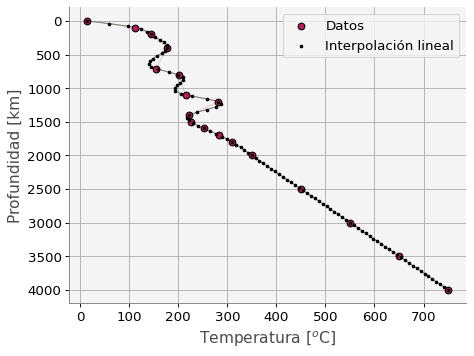

In [39]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, lw = 0.5, c='tan')

# Información interpolada
plt.scatter(T_scubic, z, c='k', s=5, label = 'Interpolación lineal', zorder=5)
plt.plot(T_scubic, z, c='gray',lw=1.0)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

## Interpolación usando scipy.

In [40]:
from scipy import interpolate

In [41]:
interpolador = interpolate.splrep(Depth, Temp, s = 0)
T_scipy = interpolate.splev(z, interpolador, der = 0)

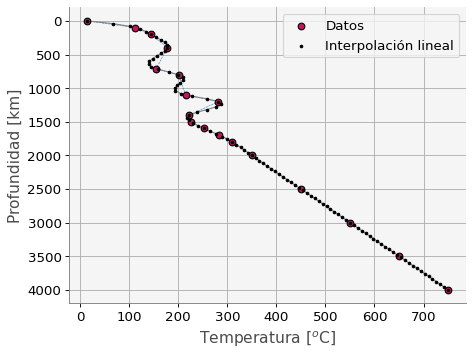

In [42]:
# Graficación de los datos 
plt.scatter(Temp, Depth, ec='k', fc='C3', zorder=5, label='Datos')
# Líneas que unen a los datos
plt.plot(Temp, Depth, '--', lw = 0.5)

# Información interpolada
plt.scatter(T_scipy, z, c='k', s=5,label = 'Interpolación lineal', zorder=5)
plt.plot(T_scipy, z, c='gray',lw=1.0)

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

In [43]:
T_diff = T_scubic - T_scipy
T_max = max(Temp)
T_min = min(Temp)
print(T_min, T_max)

15 750


In [44]:
Error = np.linalg.norm((T_scubic - T_scipy)/T_max, 2)
print(Error)

0.010775479324859095


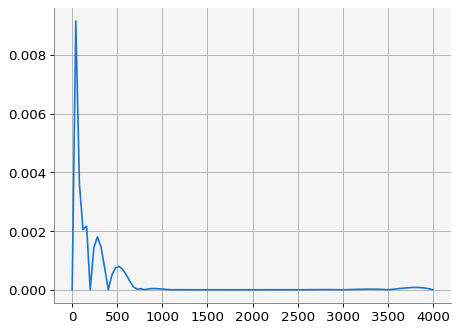

In [45]:
plt.plot(z, np.fabs(T_diff)/T_max)
plt.grid()
plt.show()

In [46]:
compara = pd.DataFrame(np.array([T_scubic, T_scipy, T_diff]).T,
                      columns =['T_scubic', 'T_scipy', 'T_diff'])
compara

,T_scubic,T_scipy,T_diff
0,15.000000,15.000000,-1.776357e-15
1,59.937118,66.806893,-6.869775e+00
2,98.317530,101.023446,-2.705917e+00
3,123.876117,122.336554,1.539564e+00
4,137.054294,135.433107,1.621187e+00
...,...,...,...
96,718.015515,718.073685,-5.816974e-02
97,726.012217,726.064707,-5.248936e-02
98,734.008421,734.049846,-4.142437e-02
99,742.004294,742.028483,-2.418963e-02


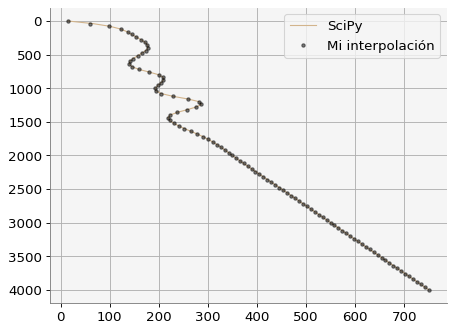

In [47]:
plt.plot(T_scipy, z, c='tan', lw=1.0, label='SciPy')
plt.plot(T_scubic, z, '.k', lw=3.0, alpha=0.5, label='Mi interpolación')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()